### Задача: обучить дерево решений, которое будет предсказывать, какое животное котик а какое собачка, основываясь на данных о котиках и собачках из датасета dogs_n_cats.csv.
Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения.

Для начала импортируем необходимые бибилиотеки для работы

In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:90% !important;height:90% !important;}</style>"
HTML(style)

Теперь импортируем данные из датасета на котором наша модель будет обучаться

In [4]:
dogs_cats_df = pd.read_csv('dogs_n_cats.csv')
dogs_cats_df.head(5)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


Проверим что в нашем датасете нет пропущенных значений (модель не умеет работать с пропусками. если они имеются необходимо провести предобработку данных). 

Сделать это можно двумя способами:

**Способ 1**, использовать метод `info()`. Он покажет нам информацитю о датафрейме (кол-во строк, столбцов, значений а также - в каких колонках имеются пропуски)

In [5]:
dogs_cats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               1000 non-null   int64  
 1   Высота              1000 non-null   float64
 2   Шерстист            1000 non-null   int64  
 3   Гавкает             1000 non-null   int64  
 4   Лазает по деревьям  1000 non-null   int64  
 5   Вид                 1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


Как мы видим во всех столбцах и сроках присутствуют непустые значения, а значит пропусков нет.

**Способ 2**, использовать метод `isnull()`.

In [6]:
dogs_cats_df.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

Создадим две переменные: одна для обучения нашей модели (X_train), вторая - которую будем предсказывать (y_train).
Для обучения мы будем использовать колонки: Длина, Высота, Шерстист, Гавкает, Лазает по деревьям. Данные колонки содержат числовые значения (типы данных int64 и float64) а значит с ними проблем не будет.

In [7]:
X_train, y_train = dogs_cats_df[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']], dogs_cats_df.Вид

Создадим классификатор для нашего дерева решений, для обучения будем использовать энтропию:

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

И проведем обучение на наших данных:

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Построим дерево решений которое у нас получилось:

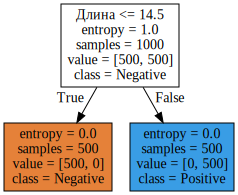

In [10]:
import sklearn
graph = Source(sklearn.tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X_train),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

Используем кросс-валидацию, для того чтобы наша модель не переобучалась

In [11]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

1.0

Загрузим данные для предсказания в новый датафрейм test_dc_df.

In [12]:
test_dc_df = pd.read_json('dataset_209691_15.txt')
test_dc_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,26,31.2,1,1,0
1,22,26.4,1,1,0
2,22,26.4,1,1,0
3,30,36.0,1,1,0
4,22,26.4,1,1,0


Используем цикл для поиска оптимальной глубины нашего дерева решений, и создадим новый датафрейм в который запишем глубину и точность предсказания на обучающей выборке

In [13]:

max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score]})
    scores_data = scores_data.append(temp_score_data)

In [14]:
scores_data

,max_depth,train_score
0,1,1.0
0,2,1.0
0,3,1.0
0,4,1.0
0,5,1.0
...,...,...
0,95,1.0
0,96,1.0
0,97,1.0
0,98,1.0


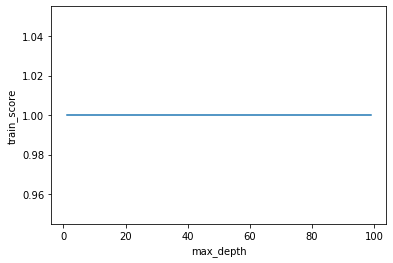

In [15]:
sns.lineplot(x='max_depth', y = 'train_score', data = scores_data)

Используя нашу модель попробуем предсказать какие животные (собачки и котики) и в каком количестве содержаться в нашем тестовом датасете (test_dc_df) 

In [16]:
clf.predict(test_dc_df)

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', '

In [17]:
predict = pd.DataFrame(clf.predict(test_dc_df), columns={'Vid'})

Получается что в нашем тестовом датасете:

In [18]:
predict.Vid.value_counts()

котик      50
собачка    50
Name: Vid, dtype: int64